# Normalized (Multiple Plot)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_multi_csv_bar_chart(csv_files, x_labels_list, subplot_titles, 
                              figsize=(16, 6),
                              ylim=(0, 4), ylabel="Speedup"):
    """
    Creates multiple grouped bar charts from different CSV files with shared y-axis.
    
    Parameters:
    csv_files (list): List of CSV file paths, one for each subplot
    x_labels_list (list of lists): X-axis labels for each subplot
    subplot_titles (list): Title for each subplot  
    figsize (tuple): Figure size (width, height)
    title (str): Overall figure title
    ylim (tuple): Y-axis limits
    ylabel (str): Y-axis label
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """

    legend_font = 32
    xlabel_font = 36
    ylabel_font = 38
    subtitle_font = 32
    
    num_plots = len(csv_files)
    
    # Calculate width ratios based on number of x-labels in each plot
    width_ratios = [len(labels) for labels in x_labels_list]
    
    # Create subplots with shared y-axis and better spacing
    fig, axes = plt.subplots(1, num_plots, figsize=figsize, sharey=True, 
                           gridspec_kw={'width_ratios': width_ratios, 'wspace': 0.0})
    
    # Ensure axes is always a list
    if num_plots == 1:
        axes = [axes]
    
    # Process each subplot with its own CSV file
    for i, (ax, csv_file, x_labels, subplot_title) in enumerate(zip(axes, csv_files, x_labels_list, subplot_titles)):
        
        # Read CSV data for this specific plot
        df = pd.read_csv(csv_file)
        
        # Extract and normalize data (using last row as baseline)
        norm_cycles = df['cycles'].values[-1]
        norm_off_chip_traffic = df['off_chip_traffic_bytes'].values[-1]
        norm_on_chip_requirement = df['on_chip_requirement_bytes'].values[-1]

        cycles = df['cycles'].values / norm_cycles
        off_chip_traffic = df['off_chip_traffic_bytes'].values / norm_off_chip_traffic
        on_chip_requirement = df['on_chip_requirement_bytes'].values / norm_on_chip_requirement
        
        # Set up bar positions
        x = np.arange(len(x_labels))
        width = 0.25
        
        # Create bars (only show legend labels on first plot)
        bars1 = ax.bar(x - width, cycles, width, 
                      label='Cycles' if i == 0 else "", 
                      alpha=0.8, color='C0')
        bars2 = ax.bar(x, off_chip_traffic, width, 
                      label='Off-chip Traffic' if i == 0 else "", 
                      alpha=0.8, color='C1')
        bars3 = ax.bar(x + width, on_chip_requirement, width, 
                      label='On-chip Mem.' if i == 0 else "", 
                      alpha=0.8, color='C2')
        
        # Customize subplot
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, ha='center')
        ax.set_title(subplot_title, fontsize=subtitle_font, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        ax.tick_params(axis='y', labelsize=ylabel_font)
        ax.tick_params(axis='x', labelsize=xlabel_font)

        ax.set_xlabel('Tile Size', fontsize=xlabel_font)
        ax.set_yscale('log')
        # Only show y-label on leftmost plot
        if i == 0:
            ax.set_ylabel(ylabel, fontsize=xlabel_font)
            
        # Remove y-axis ticks and labels from non-leftmost plots for cleaner look
        if i > 0:
            ax.tick_params(axis='y', left=False, labelleft=False)
    
    # Set y-axis limits and formatting
    axes[0].set_ylim(ylim)
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))
    
    # Add overall title
    # fig.suptitle(title, fontsize=16, fontweight='bold', y=0.95)
    
    # Add legend (only once, positioned at top)
    if num_plots > 0:
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.75, 0.94), 
                  ncol=2, fontsize=legend_font)
    
    plt.tight_layout()
    return fig


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_multi_csv_bar_chart(csv_files, x_labels_list, subplot_titles, 
                              figsize=(16, 6),
                              ylim=(0, 4), ylabel="Speedup"):
    """
    Creates multiple grouped bar charts from different CSV files with shared y-axis.
    
    Parameters:
    csv_files (list): List of CSV file paths, one for each subplot
    x_labels_list (list of lists): X-axis labels for each subplot
    subplot_titles (list): Title for each subplot  
    figsize (tuple): Figure size (width, height)
    title (str): Overall figure title
    ylim (tuple): Y-axis limits
    ylabel (str): Y-axis label
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """

    legend_font = 32
    xlabel_font = 36
    ylabel_font = 38
    subtitle_font = 32
    
    num_plots = len(csv_files)
    
    # Calculate width ratios based on number of x-labels in each plot
    width_ratios = [len(labels) for labels in x_labels_list]
    
    # Create subplots with shared y-axis and better spacing
    fig, axes = plt.subplots(1, num_plots, figsize=figsize, sharey=True, 
                           gridspec_kw={'width_ratios': width_ratios, 'wspace': 0.0})
    
    # Ensure axes is always a list
    if num_plots == 1:
        axes = [axes]
    
    # Process each subplot with its own CSV file
    for i, (ax, csv_file, x_labels, subplot_title) in enumerate(zip(axes, csv_files, x_labels_list, subplot_titles)):
        
        # Read CSV data for this specific plot
        df = pd.read_csv(csv_file)
        
        # Extract and normalize data (using last row as baseline)
        norm_cycles = df['cycles'].values[-1]
        norm_off_chip_traffic = df['off_chip_traffic_bytes'].values[-1]
        norm_on_chip_requirement = df['on_chip_requirement_bytes'].values[-1]

        cycles = df['cycles'].values / norm_cycles
        off_chip_traffic = df['off_chip_traffic_bytes'].values / norm_off_chip_traffic
        on_chip_requirement = df['on_chip_requirement_bytes'].values / norm_on_chip_requirement
        
        # Set up bar positions
        x = np.arange(len(x_labels))
        width = 0.25
        
        # Create bars (only show legend labels on first plot)
        bars1 = ax.bar(x - width, cycles, width, 
                      label='Cycles' if i == 0 else "", 
                      alpha=0.8, color='C0')
        bars2 = ax.bar(x, off_chip_traffic, width, 
                      label='Off-chip Traffic' if i == 0 else "", 
                      alpha=0.8, color='C1')
        bars3 = ax.bar(x + width, on_chip_requirement, width, 
                      label='On-chip Mem.' if i == 0 else "", 
                      alpha=0.8, color='C2')
        
        # Customize subplot
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, ha='center')
        ax.set_title(subplot_title, fontsize=subtitle_font, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        ax.tick_params(axis='y', labelsize=ylabel_font)
        ax.tick_params(axis='x', labelsize=xlabel_font)

        ax.set_xlabel('Tile Size', fontsize=xlabel_font)
        ax.set_yscale('log')
        # Only show y-label on leftmost plot
        if i == 0:
            ax.set_ylabel(ylabel, fontsize=xlabel_font)
            
        # Remove y-axis ticks and labels from non-leftmost plots for cleaner look
        if i > 0:
            ax.tick_params(axis='y', left=False, labelleft=False)
    
    # Set y-axis limits (let matplotlib handle log scale formatting naturally)
    axes[0].yaxis.set_major_formatter(plt.ScalarFormatter())
    axes[0].yaxis.get_major_formatter().set_scientific(False)
    
    # Add overall title
    # fig.suptitle(title, fontsize=16, fontweight='bold', y=0.95)
    
    # Add legend (only once, positioned at top)
    if num_plots > 0:
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.75, 0.94), 
                  ncol=2, fontsize=legend_font)
    
    plt.tight_layout()
    return fig

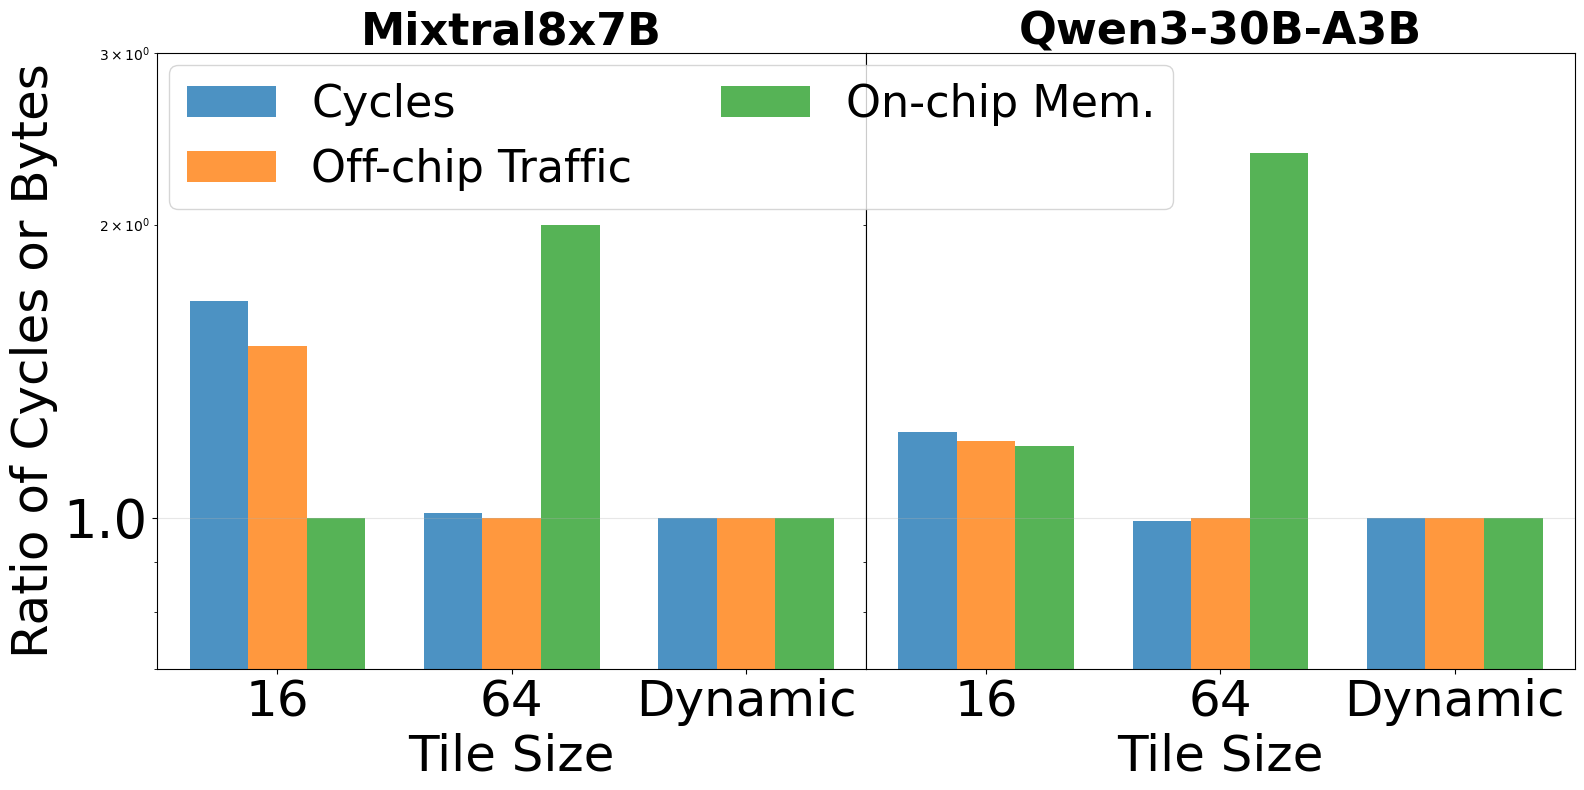

In [47]:

# Example 1: Different CSV files for each model/dataset combination
csv_files = [
    './dyn_tiling/mixtral_b64/mixtral_iter008_layer_010_f64_combined.csv',  
    './dyn_tiling/qwen_b64/qwen_iter032_layer_012_n16_f64_combined.csv',         
]

x_labels_list = [
    ['16','64','Dynamic', ],
    ['16','64','Dynamic', ]
]

subplot_titles = [
    'Mixtral8x7B',
    'Qwen3-30B-A3B', 
]

# Create the multi-plot chart
fig = create_multi_csv_bar_chart(
    csv_files=csv_files,figsize=(16, 8),
    x_labels_list=x_labels_list, 
    subplot_titles=subplot_titles,
    ylim=(0.7, 3),
    ylabel="Ratio of Cycles or Bytes"
)

plt.show()


# You can also save the plots
fig.savefig('./dyn_tiling/dyn_tile_b64_log.pdf', dpi=300, bbox_inches='tight')

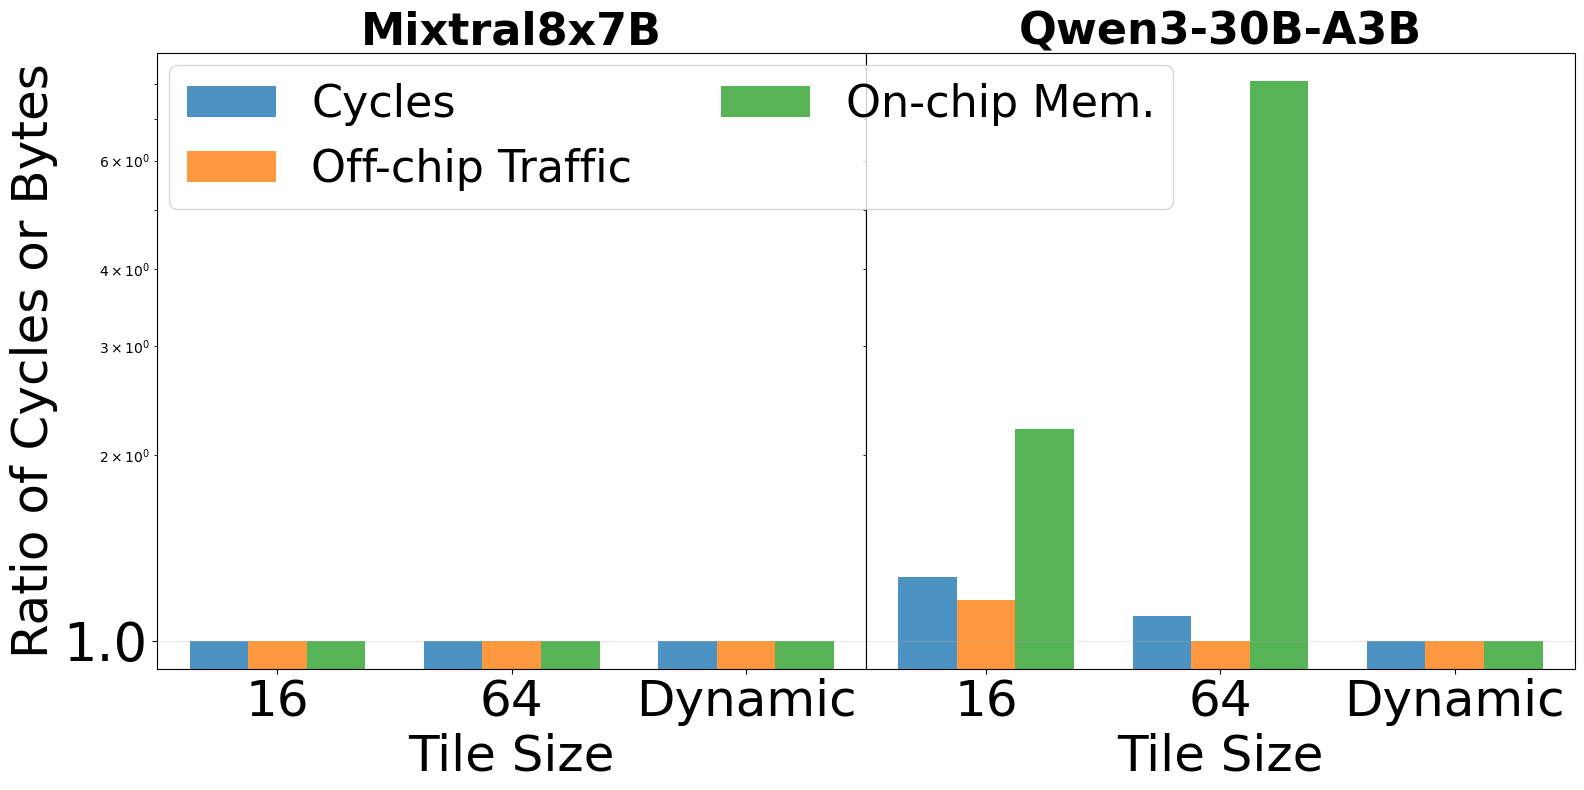

In [50]:

# Example 1: Different CSV files for each model/dataset combination
csv_files = [
    './dyn_tiling/mixtral_b1024/mixtral_b1024_2048_768_iter_022_layer_016_n256_f64_combined.csv',  
    './dyn_tiling/qwen_b1024/qwen_b1024_2048_768_iter_022_layer_016_n256_f64_combined.csv',         
]

x_labels_list = [
    ['16','64','Dynamic', ],
    ['16','64','Dynamic', ]
]

subplot_titles = [
    'Mixtral8x7B',
    'Qwen3-30B-A3B', 
]

# Create the multi-plot chart
fig = create_multi_csv_bar_chart(
    csv_files=csv_files,figsize=(16, 8),
    x_labels_list=x_labels_list, 
    subplot_titles=subplot_titles,
    ylim=None, #(0.7, 8.5),
    ylabel="Ratio of Cycles or Bytes"
)

plt.show()


# You can also save the plots
fig.savefig('./dyn_tiling/dyn_tile_b1024_log.pdf', dpi=300, bbox_inches='tight')

# Deprecated

## Separate y-axis for off-chip traffic and on-chip requirement

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns

def create_memory_cycles_plot(csv_files, x_labels=None, output_file=None, off_chip_scale = None, on_chip_scale = None, cycles_scale = None,):
    """
    Create a grouped bar chart with line overlay from multiple CSV files.
    
    Parameters:
    csv_files (list): List of CSV file paths
    x_labels (list, optional): Custom labels for x-axis. If None, uses filenames.
    output_file (str, optional): Path to save the plot
    """
    axis_font = 40
    legend_font = 28
    tick_font = 30
    x_tick_size = 28
    
    # Set up color palette
    color_palette = sns.color_palette(palette='tab20')
    
    # Validate x_labels if provided
    if x_labels is not None and len(x_labels) != len(csv_files):
        raise ValueError(f"Number of x_labels ({len(x_labels)}) must match number of CSV files ({len(csv_files)})")
    
    # Read and combine data from all CSV files
    all_data = []
    display_names = []
    
    for i, csv_file in enumerate(csv_files):
        try:
            # Read CSV file
            df = pd.read_csv(csv_file)
            
            # Get the first row (assuming single row per file based on your example)
            data_row = df.iloc[0]
            
            # Use custom label if provided, otherwise use filename
            label = x_labels[i] if x_labels else Path(csv_file).stem
            
            # Extract the required fields
            data_point = {
                'file': label,
                'off_chip_traffic_bytes': data_row['off_chip_traffic_bytes'],
                'on_chip_requirement_bytes': data_row['on_chip_requirement_bytes'],
                'cycles': data_row['cycles']
            }
            
            all_data.append(data_point)
            display_names.append(label)
            
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            continue
    
    if not all_data:
        raise ValueError("No valid CSV files could be read")
    
    # Convert to DataFrame for easier manipulation
    df_combined = pd.DataFrame(all_data)
    
    # Set up the plot with multiple y-axes
    fig, ax1 = plt.subplots(figsize=(11, 10))
    
    # Position of bars on X axis
    x_pos = np.arange(len(display_names))
    width = 0.25  # Narrower width since we have more separate elements
    
    # Create first y-axis for off_chip_traffic_bytes
    bars1 = ax1.bar(x_pos - width, df_combined['off_chip_traffic_bytes'] / 1000, 
                    width, label='Off-Chip Traffic (KB)', 
                    color=color_palette[0], alpha=0.8)
    
    # Customize first y-axis (for off-chip traffic)
    # ax1.set_xlabel('Mixtral8x7B (batch=64, bf16)', fontsize=axis_font, fontweight='bold')
    ax1.set_ylabel('Off-Chip Traffic (KB)', fontsize=axis_font, fontweight='bold', color=color_palette[0])
    ax1.set_xticks(x_pos-width/2)
    ax1.set_xticklabels(display_names, ha='center', fontsize=x_tick_size, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor=color_palette[0], labelsize=tick_font)
    ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax1.yaxis.get_offset_text().set_fontsize(tick_font)  # Adjust size as needed
    
    # Create second y-axis for on_chip_requirement_bytes
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos, df_combined['on_chip_requirement_bytes'] / 1000, 
                    width, 
                    label='On-Chip Requirement (KB)', 
                    color=color_palette[2], alpha=0.8)
    
    # Customize second y-axis (for on-chip requirement)
    # ax2.set_ylabel('On-Chip Requirement (KB)', fontsize=axis_font, fontweight='bold', color=color_palette[2])
    ax2.tick_params(axis='y', labelcolor=color_palette[2], labelsize=tick_font)
    ax2.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax2_offset_text = ax2.yaxis.get_offset_text()
    ax2_offset_text.set_fontsize(tick_font)
    ax2_offset_text.set_position((0.9, 1.02))  # (x, y) in axis coordinates
    
    
    # Create third y-axis for cycles
    ax3 = ax1.twinx()
    # Offset the third axis
    ax3.spines['right'].set_position(('outward', 60))
    
    # Create line plot for cycles
    line = ax3.plot(x_pos-width/2, df_combined['cycles'], 
                    color=color_palette[4], marker='o', linewidth=3, 
                    markersize=8, label='Cycles')
    
    
    # Customize third y-axis
    # ax3.set_ylabel('Cycles', fontsize=axis_font, fontweight='bold', color=color_palette[4])
    ax3.tick_params(axis='y', labelcolor=color_palette[4], labelsize=tick_font)
    ax3.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax3_offset_text = ax3.yaxis.get_offset_text()
    ax3_offset_text.set_fontsize(tick_font)
    ax3_offset_text.set_position((1, 1.02))  # (x, y) in axis coordinates
    
    
    # ==================== Set Range ====================
    if off_chip_scale is not None:
        ax1.set_ylim(off_chip_scale) # off-chip traffic
    if on_chip_scale is not None:
        ax2.set_ylim(on_chip_scale) # on-chip requirement
    if cycles_scale is not None:
        ax3.set_ylim(cycles_scale) # cycles
    

    # Add value labels on bars and line
    # def add_value_labels_single_axis(bars, ax, suffix=""):
    #     for bar in bars:
    #         height = bar.get_height()
    #         ax.annotate(f'{height:,.0f}{suffix}',
    #                    xy=(bar.get_x() + bar.get_width() / 2, height),
    #                    xytext=(0, 3),  # 3 points vertical offset
    #                    textcoords="offset points",
    #                    ha='center', va='bottom',
    #                    fontsize=8, rotation=0)
    
    # Add labels to bars
    # add_value_labels_single_axis(bars1, ax1)
    # add_value_labels_single_axis(bars2, ax2)
    
    # Add value labels to line points
    # for i, (x, y) in enumerate(zip(x_pos, df_combined['cycles'])):
    #     ax3.annotate(f'{y:,.0f}',
    #         xy=(x-width/2, y),
    #         xytext=(0, 10),
    #         textcoords="offset points",
    #         ha='center', va='bottom',
    #         fontsize=8, color=color_palette[4], fontweight='bold')
    
    
    # Combine legends from all axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    
    # Create a single legend with all elements
    all_handles = lines1 + lines2 + lines3
    all_labels = labels1 + labels2 + labels3
    ax1.legend(all_handles, all_labels, loc='upper right', fontsize=legend_font)
    
    # Add title and grid
    # plt.title('Memory Traffic and Cycles Analysis', fontsize=16, fontweight='bold', pad=20)
    ax1.grid(True, alpha=0.3)
    
    # Adjust layout to prevent clipping
    plt.tight_layout()
    
    # Save plot if output file specified
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {output_file}")
    
    # Show plot
    plt.show()

Plot saved to ./visualize/mixtral_512_1792_iter008_layer_010.pdf


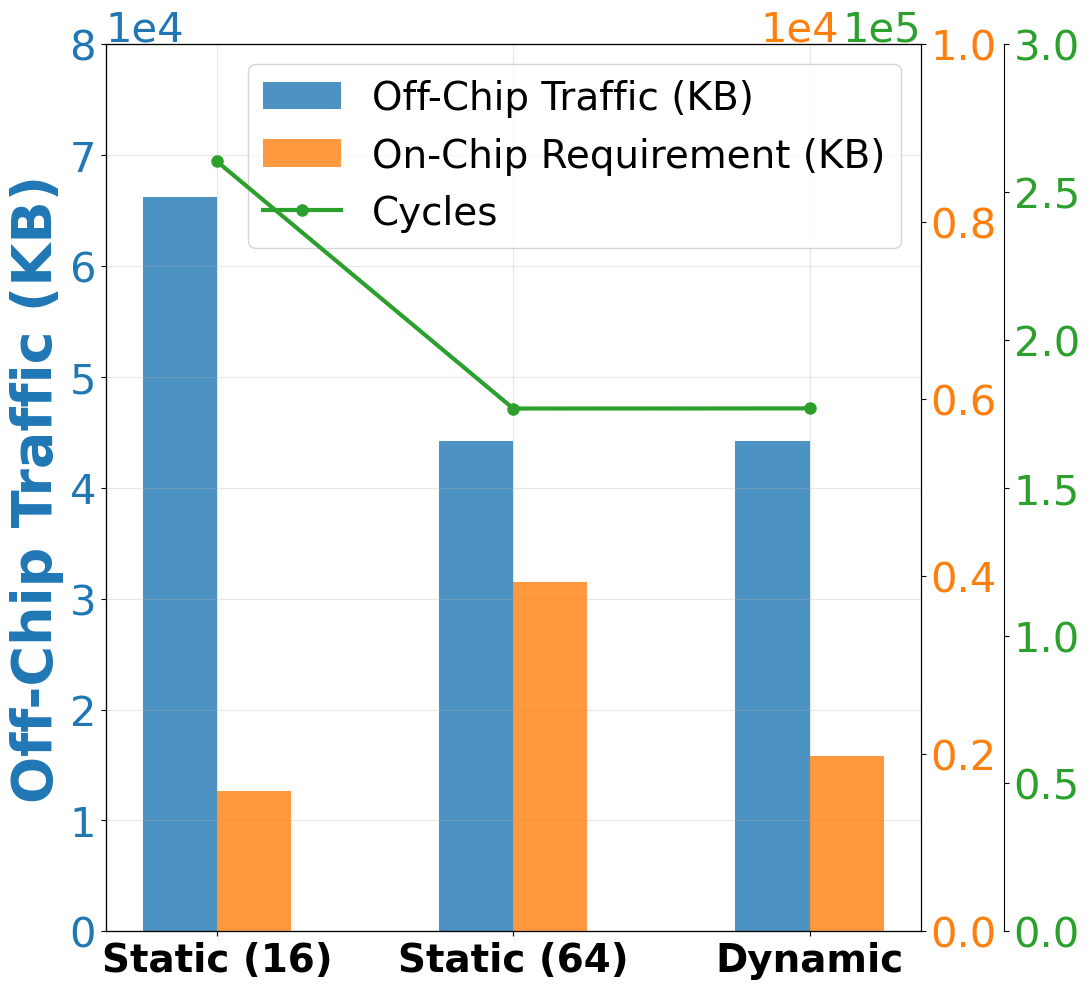

In [170]:
dyn_tile = "./mixtral_512_1792_round_16_iter008_layer_010_n_dyn_f32.csv"
static_64_tile = "./mixtral_512_1792_80gb_max4192_iter008_layer_010_n64_f32.csv"
static_16_tile = "./mixtral_512_1792_80gb_max4192_iter008_layer_010_n16_f32.csv"

csv_files = [static_16_tile,static_64_tile, dyn_tile]
output_file = "./visualize/mixtral_512_1792_iter008_layer_010.pdf"
# output_file = None
labels = ['Static (16)','Static (64)', 'Dynamic', ]

off_chip_scale = (0,8*1e4) # off-chip traffic
on_chip_scale = (0,1e4) # on-chip requirement
cycles_scale = (0,3*1e5) # cycles

create_memory_cycles_plot(csv_files, x_labels=labels, output_file=output_file, off_chip_scale=off_chip_scale, on_chip_scale=on_chip_scale, cycles_scale=cycles_scale)

Plot saved to ./dyn_tiling/mixtral_4096_14336_iter008_layer_010.pdf


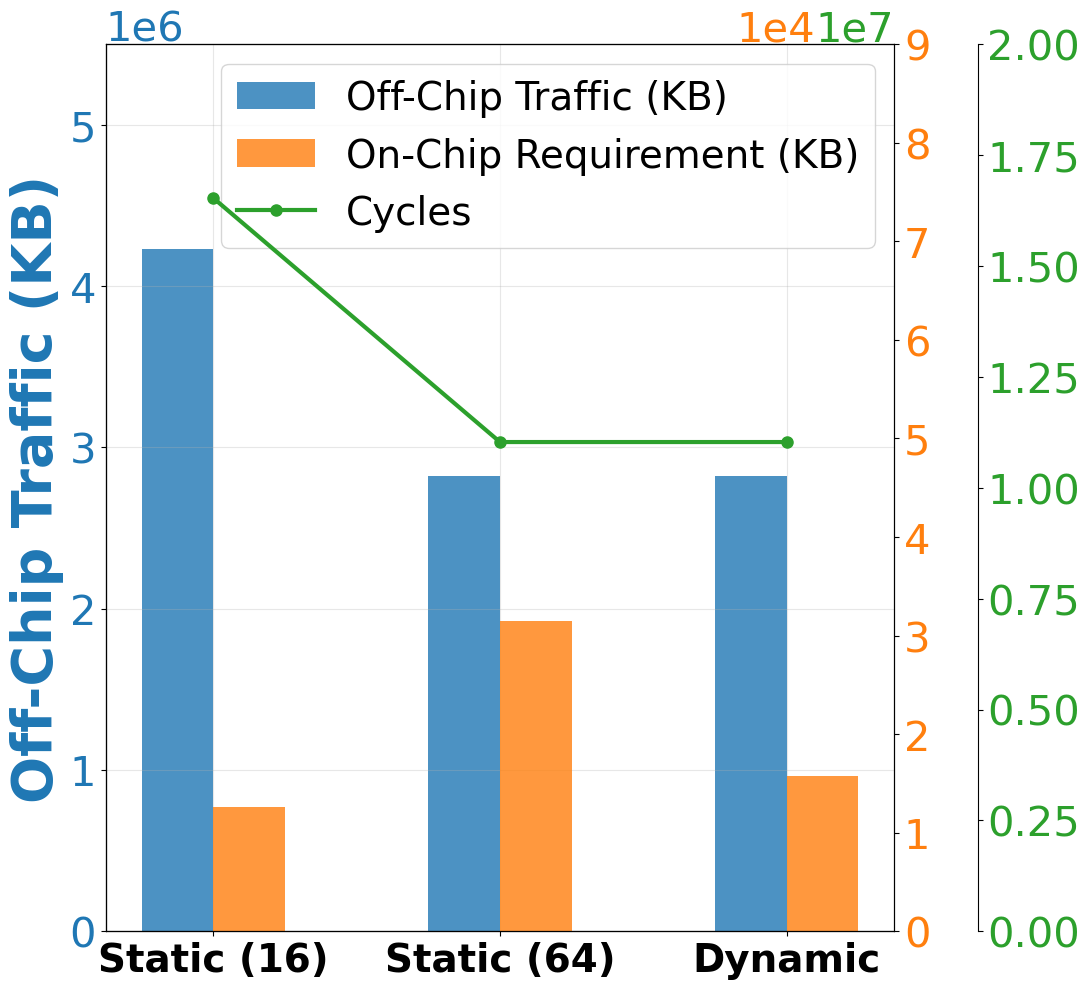

In [171]:
dyn_tile = "./mixtral_4096_14336_round_16_iter008_layer_010_n_dyn_f32.csv"
static_64_tile = "./mixtral_4096_14336_80gb_max4192_iter008_layer_010_n64_f32.csv"
static_16_tile = "./mixtral_4096_14336_80gb_max4192_iter008_layer_010_n16_f32.csv"

csv_files = [static_16_tile,static_64_tile, dyn_tile]
output_file = "./dyn_tiling/mixtral_4096_14336_iter008_layer_010.pdf"
# output_file = None
labels = ['Static (16)','Static (64)', 'Dynamic', ]

off_chip_scale = None
# on_chip_scale = None
# cycles_scale = None
off_chip_scale = (0,5.5*1e6) # off-chip traffic
on_chip_scale = (0,9*1e4) # on-chip requirement
cycles_scale = (0,2*1e7) # cycles

create_memory_cycles_plot(csv_files, x_labels=labels, output_file=output_file, off_chip_scale=off_chip_scale, on_chip_scale=on_chip_scale, cycles_scale=cycles_scale)

In [172]:
dyn_tile = "./dyn_tiling/mixtral_4096_14336_round_16_iter008_layer_010_n_dyn_f64.csv"
static_64_tile = "./dyn_tiling/mixtral_4096_14336_80gb_max4192_iter008_layer_010_n64_f64.csv"
static_16_tile = "./dyn_tiling/mixtral_4096_14336_80gb_max4192_iter008_layer_010_n16_f64.csv"

csv_files = [static_16_tile,static_64_tile, dyn_tile]
output_file = "./dyn_tiling/mixtral_4096_14336_iter008_layer_010.pdf"
# output_file = None
labels = ['Static (16)','Static (64)', 'Dynamic', ]

off_chip_scale = None
# on_chip_scale = None
cycles_scale = None
off_chip_scale = (0,5.5*1e6) # off-chip traffic
on_chip_scale = (0,9*1e4) # on-chip requirement
# cycles_scale = (0,2*1e7) # cycles

create_memory_cycles_plot(csv_files, x_labels=labels, output_file=output_file, off_chip_scale=off_chip_scale, on_chip_scale=on_chip_scale, cycles_scale=cycles_scale)

Error reading ./dyn_tiling/mixtral_4096_14336_80gb_max4192_iter008_layer_010_n16_f64.csv: [Errno 2] No such file or directory: './dyn_tiling/mixtral_4096_14336_80gb_max4192_iter008_layer_010_n16_f64.csv'
Error reading ./dyn_tiling/mixtral_4096_14336_80gb_max4192_iter008_layer_010_n64_f64.csv: [Errno 2] No such file or directory: './dyn_tiling/mixtral_4096_14336_80gb_max4192_iter008_layer_010_n64_f64.csv'
Error reading ./dyn_tiling/mixtral_4096_14336_round_16_iter008_layer_010_n_dyn_f64.csv: [Errno 2] No such file or directory: './dyn_tiling/mixtral_4096_14336_round_16_iter008_layer_010_n_dyn_f64.csv'


ValueError: No valid CSV files could be read

## Qwen

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns

def create_memory_cycles_plot_left(csv_files, x_labels=None, output_file=None, off_chip_scale = None, on_chip_scale = None, cycles_scale = None,):
    """
    Create a grouped bar chart with line overlay from multiple CSV files.
    
    Parameters:
    csv_files (list): List of CSV file paths
    x_labels (list, optional): Custom labels for x-axis. If None, uses filenames.
    output_file (str, optional): Path to save the plot
    """
    axis_font = 40
    legend_font = 28
    tick_font = 30
    x_tick_size = 28
    
    # Set up color palette
    color_palette = sns.color_palette(palette='tab20')
    
    # Validate x_labels if provided
    if x_labels is not None and len(x_labels) != len(csv_files):
        raise ValueError(f"Number of x_labels ({len(x_labels)}) must match number of CSV files ({len(csv_files)})")
    
    # Read and combine data from all CSV files
    all_data = []
    display_names = []
    
    for i, csv_file in enumerate(csv_files):
        try:
            # Read CSV file
            df = pd.read_csv(csv_file)
            
            # Get the first row (assuming single row per file based on your example)
            data_row = df.iloc[0]
            
            # Use custom label if provided, otherwise use filename
            label = x_labels[i] if x_labels else Path(csv_file).stem
            
            # Extract the required fields
            data_point = {
                'file': label,
                'off_chip_traffic_bytes': data_row['off_chip_traffic_bytes'],
                'on_chip_requirement_bytes': data_row['on_chip_requirement_bytes'],
                'cycles': data_row['cycles']
            }
            
            all_data.append(data_point)
            display_names.append(label)
            
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            continue
    
    if not all_data:
        raise ValueError("No valid CSV files could be read")
    
    # Convert to DataFrame for easier manipulation
    df_combined = pd.DataFrame(all_data)
    
    # Set up the plot with multiple y-axes
    fig, ax1 = plt.subplots(figsize=(11, 10))
    
    # Position of bars on X axis
    x_pos = np.arange(len(display_names))
    width = 0.25  # Narrower width since we have more separate elements
    
    # Create first y-axis for off_chip_traffic_bytes
    bars1 = ax1.bar(x_pos - width, df_combined['off_chip_traffic_bytes'] / 1000, 
                    width, label='Off-Chip Traffic (KB)', 
                    color=color_palette[0], alpha=0.8)
    
    # Customize first y-axis (for off-chip traffic)
    # ax1.set_xlabel('Mixtral8x7B (batch=64, bf16)', fontsize=axis_font, fontweight='bold')
    # ax1.set_ylabel('Off-Chip Traffic (KB)', fontsize=axis_font, fontweight='bold', color=color_palette[0])
    ax1.set_xticks(x_pos-width/2)
    ax1.set_xticklabels(display_names, ha='center', fontsize=xlabel_font, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor=color_palette[0], labelsize=tick_font)
    ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax1.yaxis.get_offset_text().set_fontsize(tick_font)  # Adjust size as needed
    
    # Create second y-axis for on_chip_requirement_bytes
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos, df_combined['on_chip_requirement_bytes'] / 1000, 
                    width, 
                    label='On-Chip Requirement (KB)', 
                    color=color_palette[2], alpha=0.8)
    
    # Customize second y-axis (for on-chip requirement)
    ax2.set_ylabel('On-Chip Requirement (KB)', fontsize=axis_font, fontweight='bold', color=color_palette[2])
    ax2.tick_params(axis='y', labelcolor=color_palette[2], labelsize=tick_font)
    ax2.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax2_offset_text = ax2.yaxis.get_offset_text()
    ax2_offset_text.set_fontsize(tick_font)
    ax2_offset_text.set_position((0.89, 1.02))  # (x, y) in axis coordinates
    
    
    # Create third y-axis for cycles
    ax3 = ax1.twinx()
    # Offset the third axis
    ax3.spines['right'].set_position(('outward', 80))
    
    # Create line plot for cycles
    line = ax3.plot(x_pos-width/2, df_combined['cycles'], 
                    color=color_palette[4], marker='o', linewidth=3, 
                    markersize=8, label='Cycles')
    
    
    # Customize third y-axis
    ax3.set_ylabel('Cycles', fontsize=axis_font, fontweight='bold', color=color_palette[4])
    ax3.tick_params(axis='y', labelcolor=color_palette[4], labelsize=tick_font)
    ax3.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax3_offset_text = ax3.yaxis.get_offset_text()
    ax3_offset_text.set_fontsize(tick_font)
    ax3_offset_text.set_position((1, 1.02))  # (x, y) in axis coordinates
    
    
    # ==================== Set Range ====================
    if off_chip_scale is not None:
        ax1.set_ylim(off_chip_scale) # off-chip traffic
    if on_chip_scale is not None:
        ax2.set_ylim(on_chip_scale) # on-chip requirement
    if cycles_scale is not None:
        ax3.set_ylim(cycles_scale) # cycles
    

    # Add value labels on bars and line
    # def add_value_labels_single_axis(bars, ax, suffix=""):
    #     for bar in bars:
    #         height = bar.get_height()
    #         ax.annotate(f'{height:,.0f}{suffix}',
    #                    xy=(bar.get_x() + bar.get_width() / 2, height),
    #                    xytext=(0, 3),  # 3 points vertical offset
    #                    textcoords="offset points",
    #                    ha='center', va='bottom',
    #                    fontsize=8, rotation=0)
    
    # Add labels to bars
    # add_value_labels_single_axis(bars1, ax1)
    # add_value_labels_single_axis(bars2, ax2)
    
    # Add value labels to line points
    # for i, (x, y) in enumerate(zip(x_pos, df_combined['cycles'])):
    #     ax3.annotate(f'{y:,.0f}',
    #         xy=(x-width/2, y),
    #         xytext=(0, 10),
    #         textcoords="offset points",
    #         ha='center', va='bottom',
    #         fontsize=8, color=color_palette[4], fontweight='bold')
    
    
    # Combine legends from all axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    
    # Create a single legend with all elements
    all_handles = lines1 + lines2 + lines3
    all_labels = labels1 + labels2 + labels3
    ax1.legend(all_handles, all_labels, loc='upper right', fontsize=legend_font)
    
    # Add title and grid
    # plt.title('Memory Traffic and Cycles Analysis', fontsize=16, fontweight='bold', pad=20)
    ax1.grid(True, alpha=0.3)
    
    # Adjust layout to prevent clipping
    plt.tight_layout()
    
    # Save plot if output file specified
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {output_file}")
    
    # Show plot
    plt.show()

Plot saved to ./visualize/qwen_2048_768_iter032_layer_012.pdf


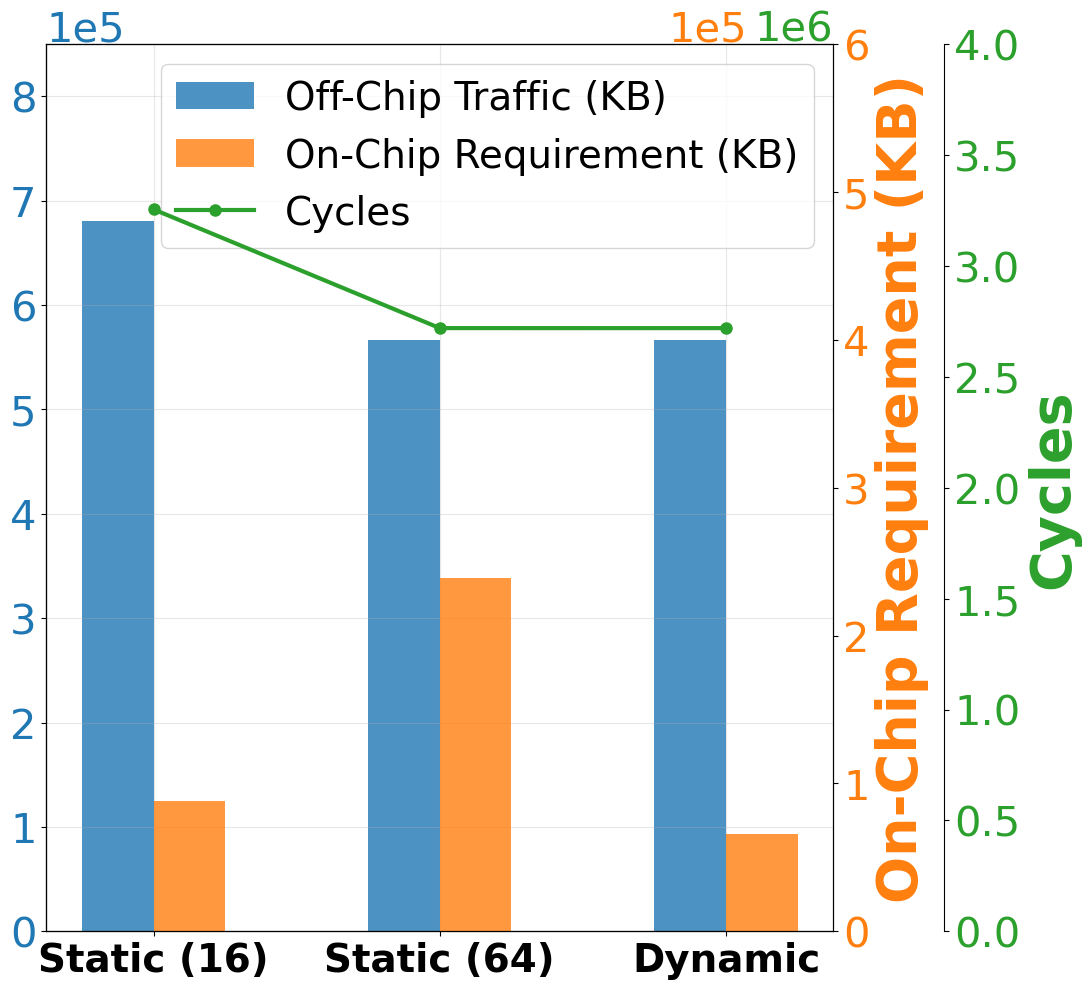

In [ ]:
dyn_tile = "./qwen_2048_768_round_16_iter032_layer_012_n_dyn_f24.csv"
static_64_tile = "./qwen_2048_768_iter032_layer_012_n64_f24.csv"
static_16_tile = "./qwen_2048_768_iter032_layer_012_n16_f24.csv"

csv_files = [static_16_tile,static_64_tile, dyn_tile]
output_file = "./visualize/qwen_2048_768_iter032_layer_012.pdf"
# output_file = None
labels = ['Static (16)','Static (64)', 'Dynamic', ]

off_chip_scale = None
on_chip_scale = None
cycles_scale = None
off_chip_scale = (0,8.5*1e5) # off-chip traffic
on_chip_scale = (0,6*1e5) # on-chip requirement
cycles_scale = (0,4*1e6) # cycles

create_memory_cycles_plot_left(csv_files, x_labels=labels, output_file=output_file, off_chip_scale=off_chip_scale, on_chip_scale=on_chip_scale, cycles_scale=cycles_scale)

# Normalized (Single)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_grouped_bar_chart(csv_file_path, x_labels, figsize=(12, 8)):
    """
    Creates a grouped bar chart from CSV data showing cycles, off_chip_traffic_bytes, and on_chip_requirement_bytes.
    
    Parameters:
    csv_file_path (str): Path to the CSV file
    x_labels (list): List of labels for the x-axis
    figsize (tuple): Figure size (width, height)
    title (str): Title for the chart
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """
    
    legend_font = 31
    xlabel_font = 36

    # Read the CSV file
    df = pd.read_csv(csv_file_path)
    
    # Extract the columns we need
    norm_cycles = df['cycles'].values[-1]
    norm_off_chip_traffic = df['off_chip_traffic_bytes'].values[-1]
    norm_on_chip_requirement = df['on_chip_requirement_bytes'].values[-1]


    cycles = df['cycles'].values / norm_cycles
    off_chip_traffic = df['off_chip_traffic_bytes'].values/norm_off_chip_traffic
    on_chip_requirement = df['on_chip_requirement_bytes'].values/norm_on_chip_requirement

    
    # Ensure x_labels length matches data length
    if len(x_labels) != len(df):
        print(f"Warning: Number of x_labels ({len(x_labels)}) doesn't match number of rows ({len(df)})")
        # Truncate or extend x_labels as needed
        if len(x_labels) > len(df):
            x_labels = x_labels[:len(df)]
        else:
            x_labels.extend([f"Row {i+1}" for i in range(len(x_labels), len(df))])
    
    # Set up the bar chart
    x = np.arange(len(x_labels))  # Label locations
    width = 0.25  # Width of bars
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create the bars
    bars1 = ax.bar(x - width, cycles, width, label='Cycles', alpha=0.8)
    bars2 = ax.bar(x, off_chip_traffic, width, label='Off-chip Traffic (bytes)', alpha=0.8)
    bars3 = ax.bar(x + width, on_chip_requirement, width, label='On-chip Memory (bytes)', alpha=0.8)
    
    # Customize the chart
    # ax.set_xlabel('Configuration')
    ax.set_ylabel('Speedup / Traffic / Memory', fontsize=xlabel_font)
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels,ha='center', fontsize=xlabel_font)
    ax.legend(fontsize=legend_font)
    ax.set_ylim(0, 3)  # Sets y-axis from 0 to 2

    # Add value labels on top of bars (optional, can be removed if cluttered)
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom',
                       fontsize=8, rotation=90)
    
    # Uncomment the following lines if you want value labels on bars
    # add_value_labels(bars1)
    # add_value_labels(bars2)
    # add_value_labels(bars3)
    
    # Format y-axis to show values in scientific notation or with commas
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))
    ax.tick_params(axis='y', labelsize=legend_font-4)  # Change 14 to your desired size

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, axis='y')
    
    return fig


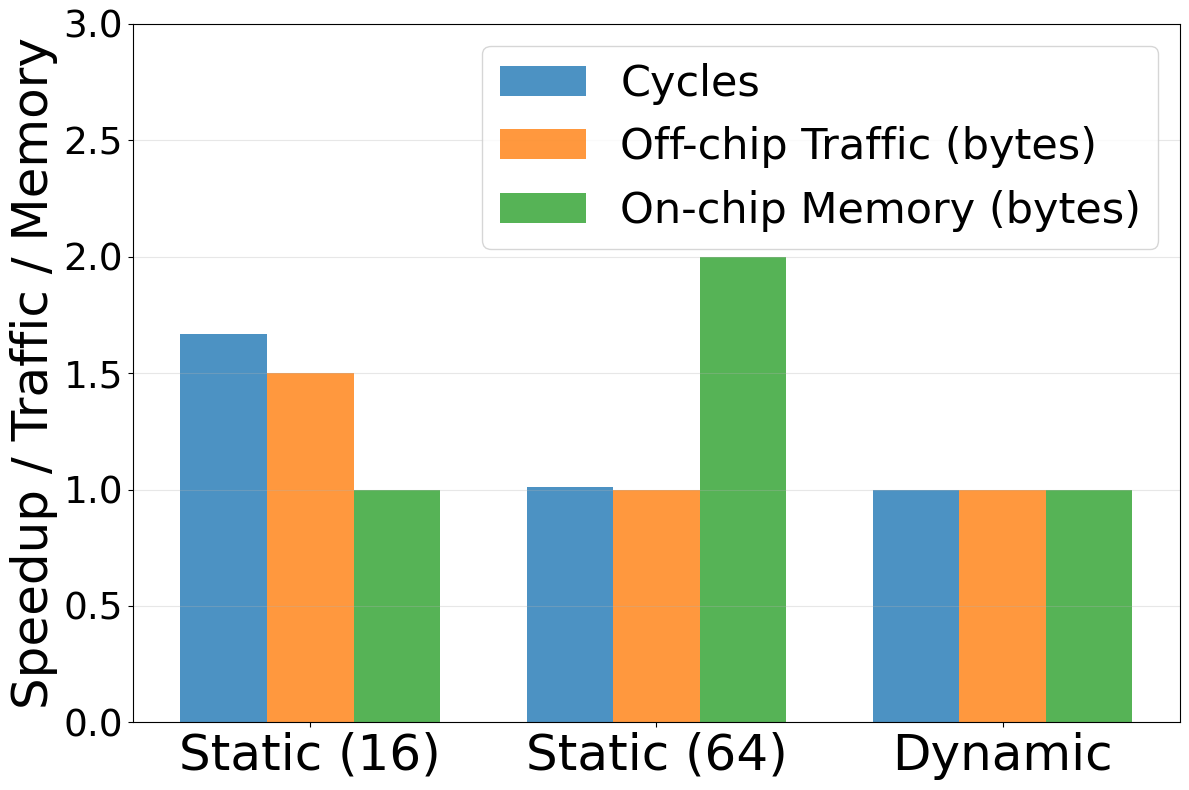

In [ ]:
x_labels = ['Static (16)','Static (64)', 'Dynamic', ]

    
# Create the chart
fig = create_grouped_bar_chart('./dyn_tiling/mixtral_b64/mixtral_iter008_layer_010_f64_combined.csv', x_labels)

# Show the plot
plt.show()
fig.savefig('./dyn_tiling/mixtral_b64/mixtral_b64_dyntile.pdf', dpi=300, bbox_inches='tight')